<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv('/content/Vaccine_State (1).csv')
df.head(5)

,States,First_Dose,Second_Dose
0,Andaman And Nicobar,294001,200157
1,Andhra Pradesh,32976969,20375181
2,Arunachal Pradesh,771875,534486
3,Assam,20172463,8068795
4,Bihar,49874828,18346781


In [2]:
df.describe()

,First_Dose,Second_Dose
count,3.600000e+01,3.600000e+01
mean,2.028150e+07,9.144113e+06
std,2.359585e+07,9.805481e+06
min,5.512900e+04,4.595100e+04
25%,8.874950e+05,5.438572e+05
50%,1.395366e+07,5.912310e+06
75%,3.505258e+07,1.780105e+07
max,9.817886e+07,3.268190e+07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   States       36 non-null     object
 1   First_Dose   36 non-null     int64 
 2   Second_Dose  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [4]:
df.shape

(36, 3)

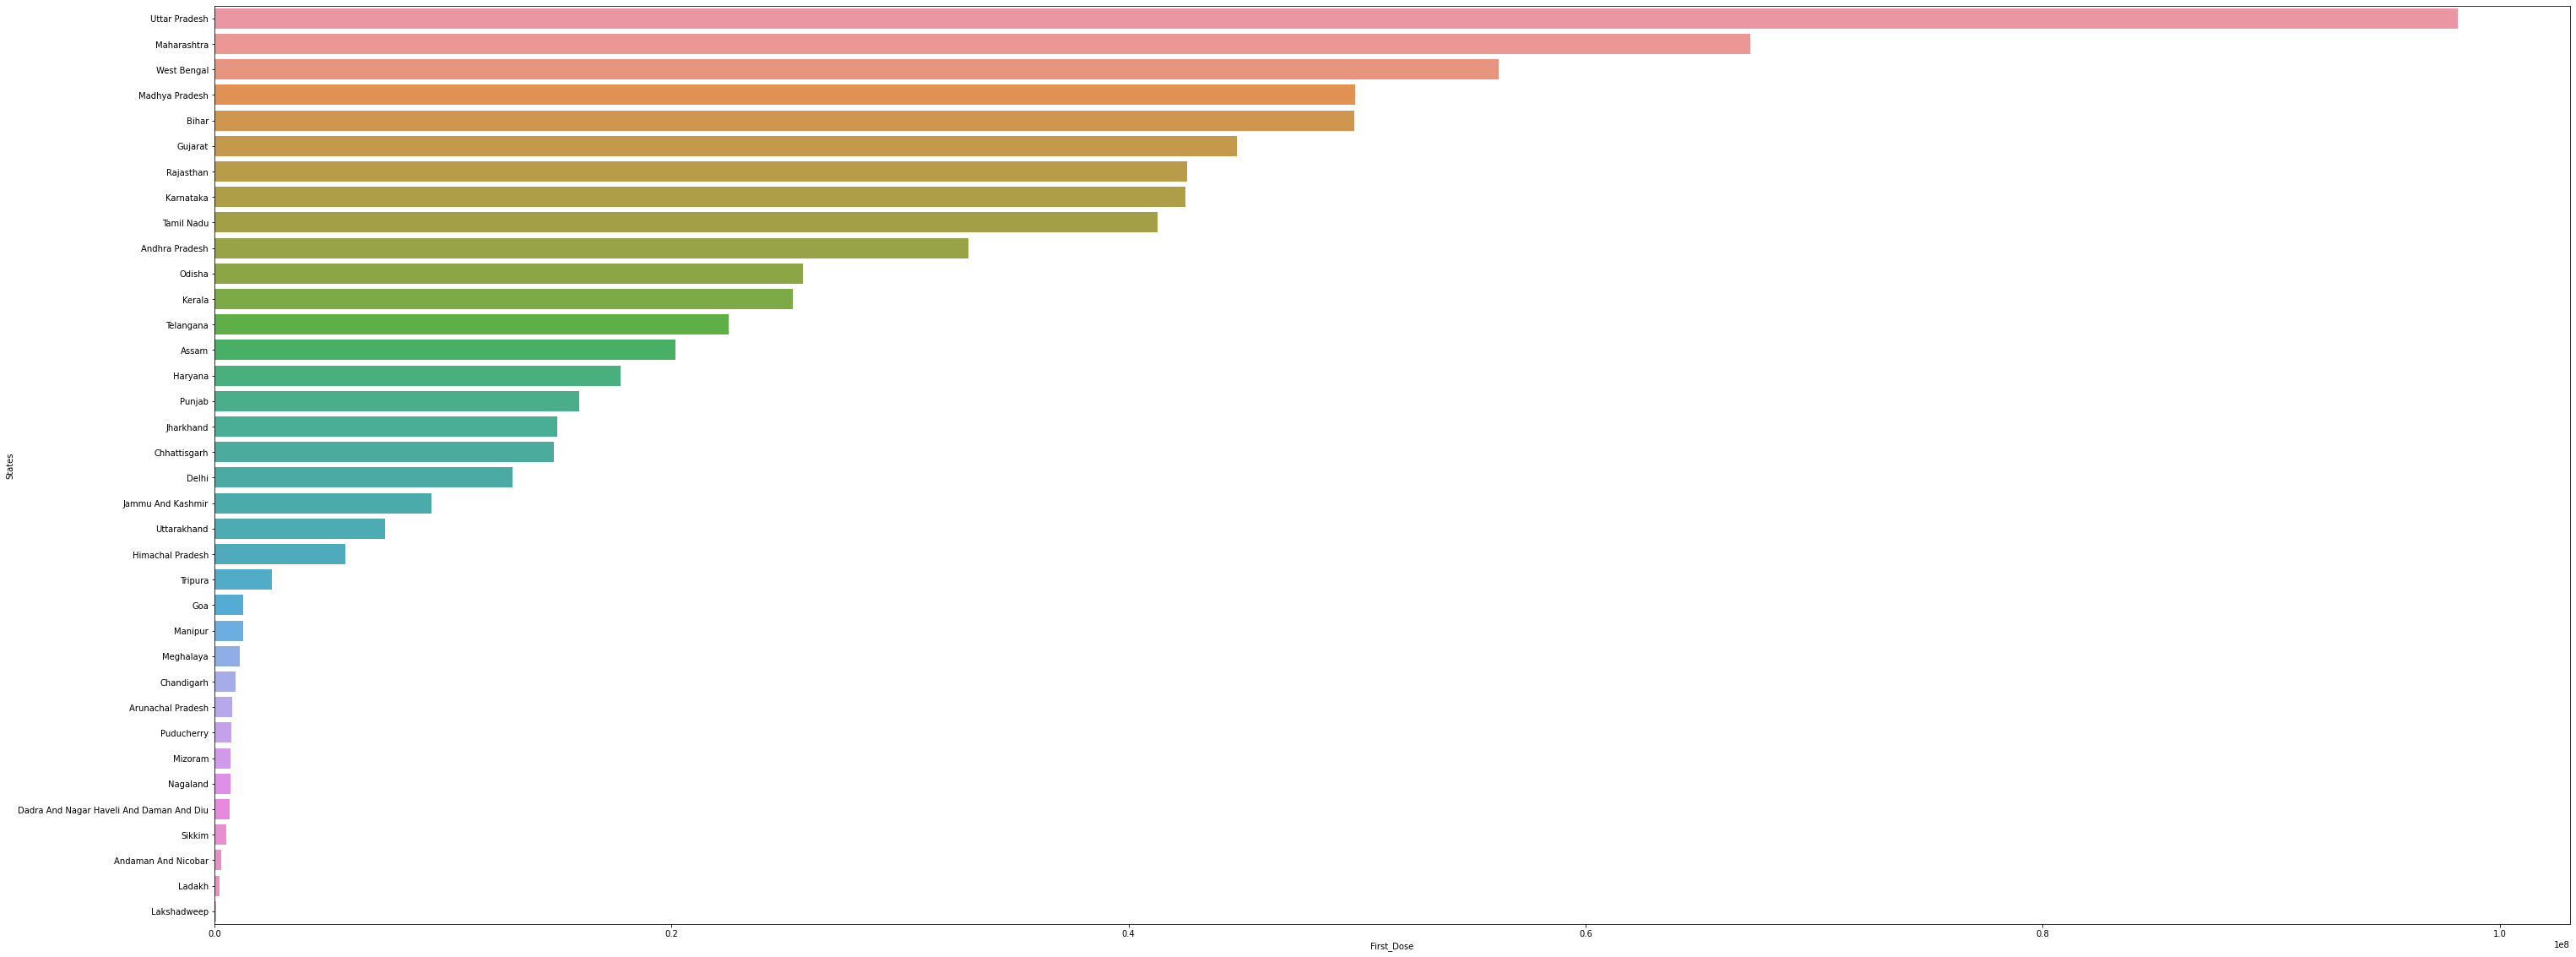

In [5]:
#Visualization of Vaccine Dose 1 and 2 ;State Wise
fig, ax = plt.subplots(figsize = (50,20))
ax = sns.barplot(x="First_Dose", y="States",orient= "h",data=df.sort_values("First_Dose",ascending=False)) 

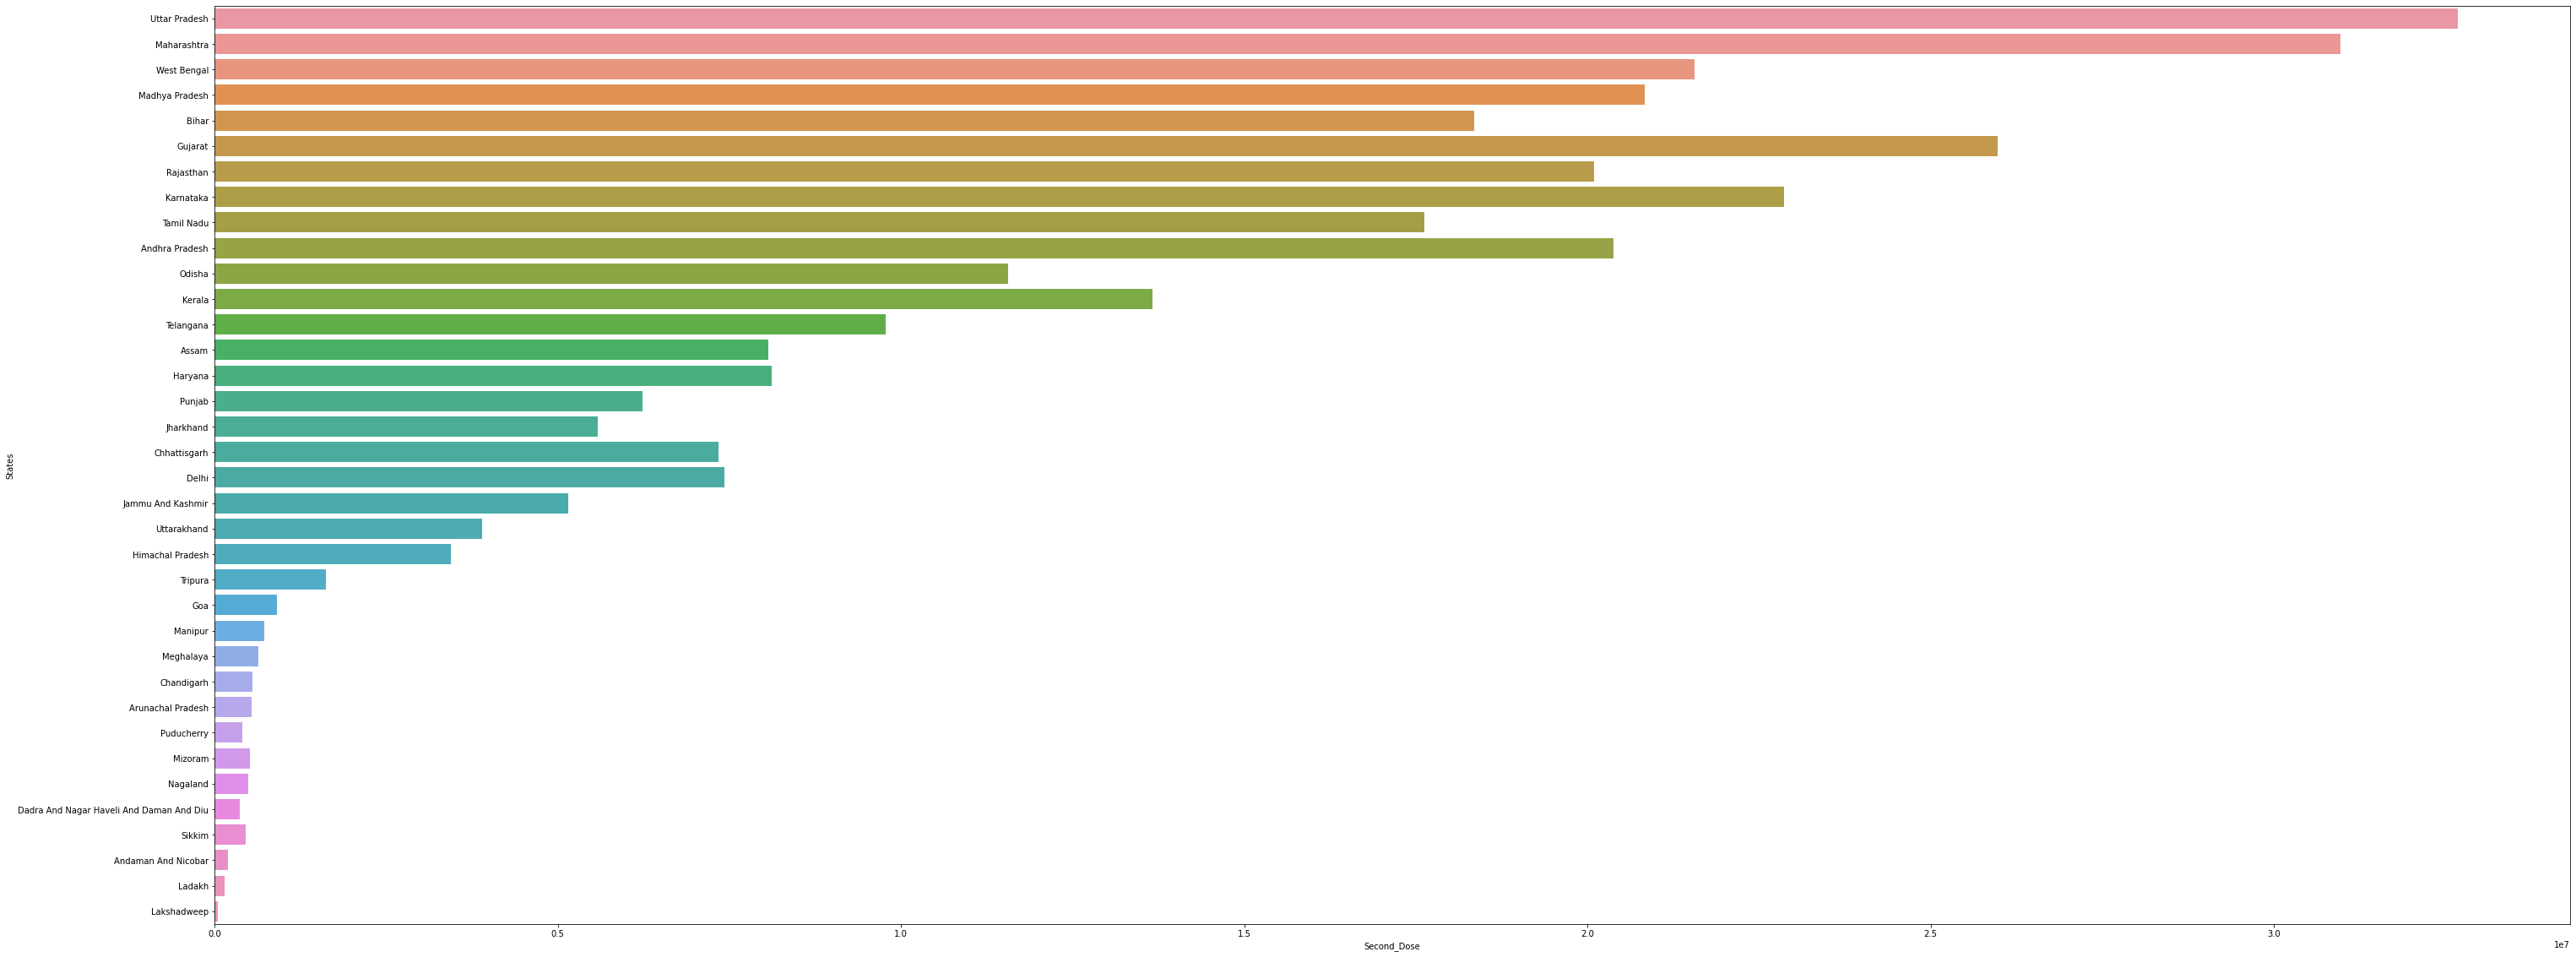

In [6]:
fig, ax = plt.subplots(figsize = (50,20))
ax = sns.barplot(x="Second_Dose", y="States",orient= "h",data=df.sort_values("First_Dose",ascending=False)) 

<Axes: xlabel='Second_Dose', ylabel='States'>

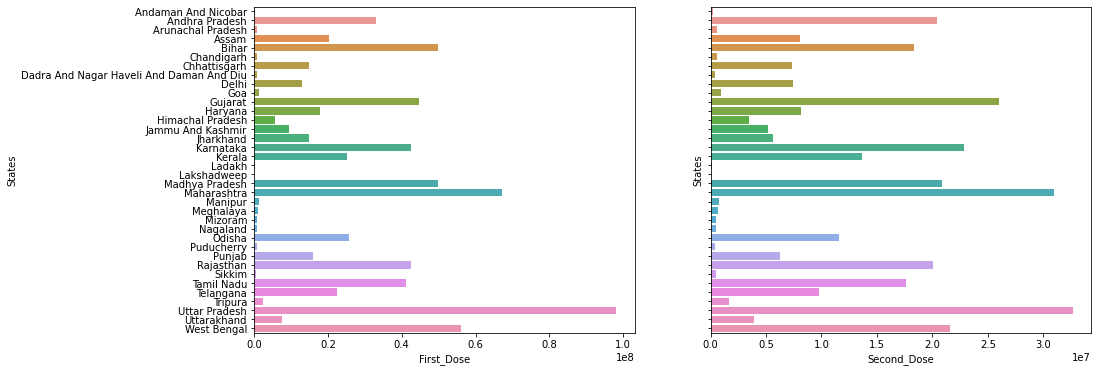

In [7]:
fig4, ax4 = plt.subplots(1, 2,sharey="row",figsize=(15,6))

sns.barplot(x="First_Dose", y="States", data=df,ax=ax4[0])
sns.barplot(x="Second_Dose", y="States", data=df,ax=ax4[1])

<Axes: xlabel='Second_Dose', ylabel='States'>

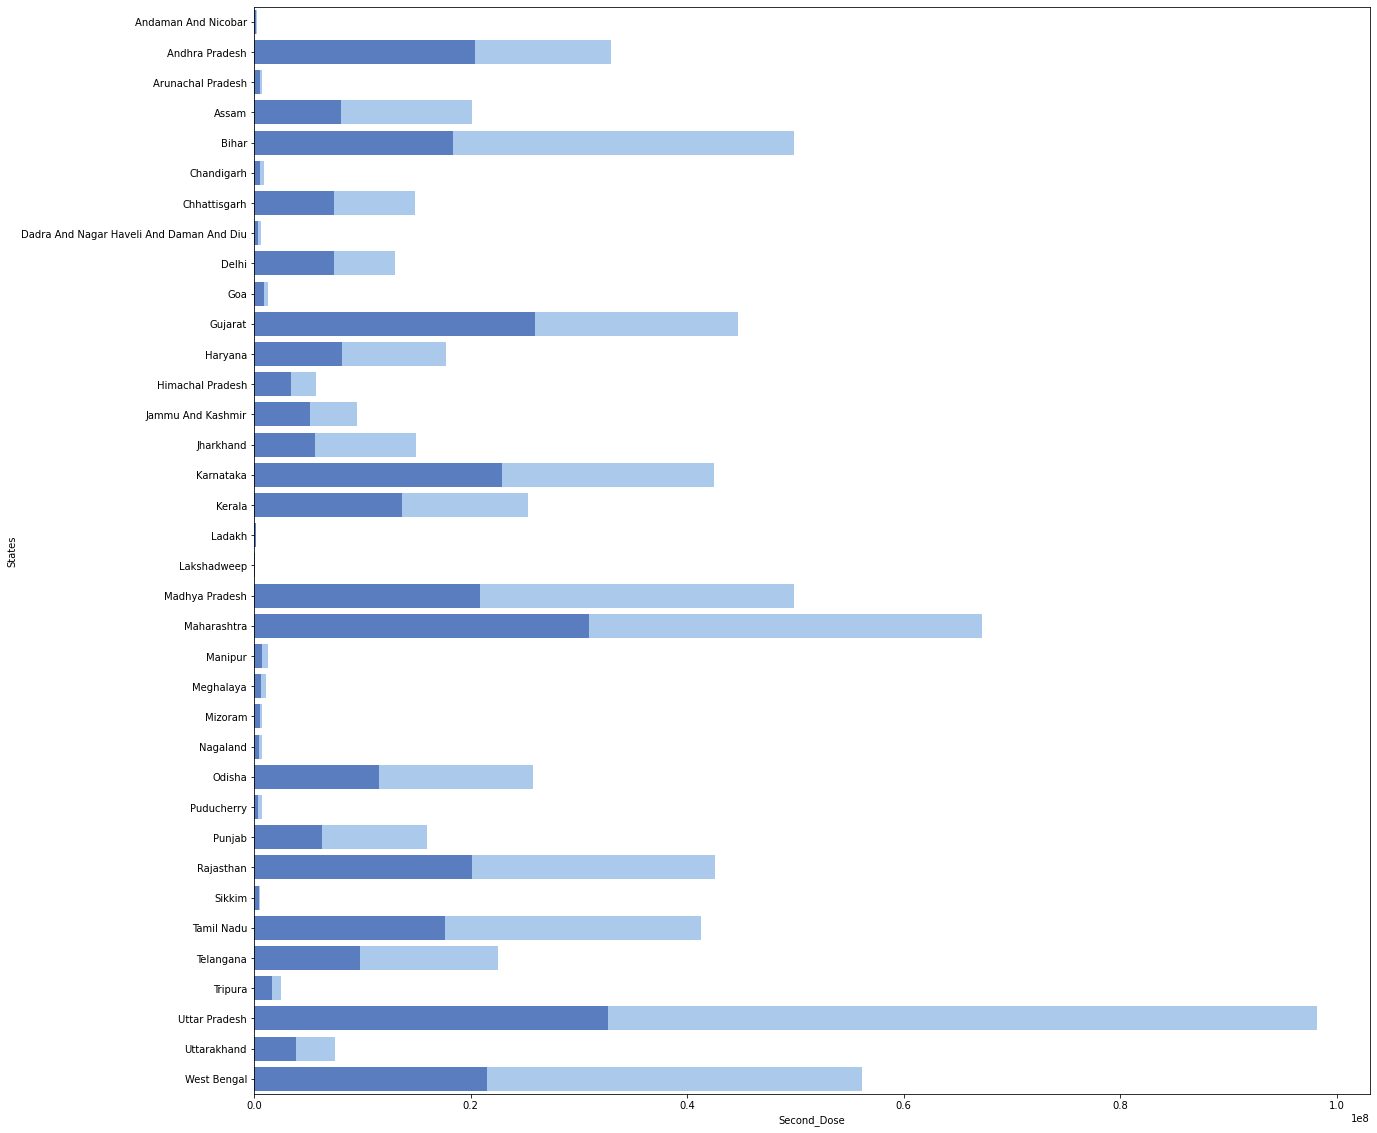

In [8]:
fig4, ax = plt.subplots(1,sharey="row",figsize=(20,20))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df,
            label="Dose 1", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df,
            label="First_Dose", color="b")

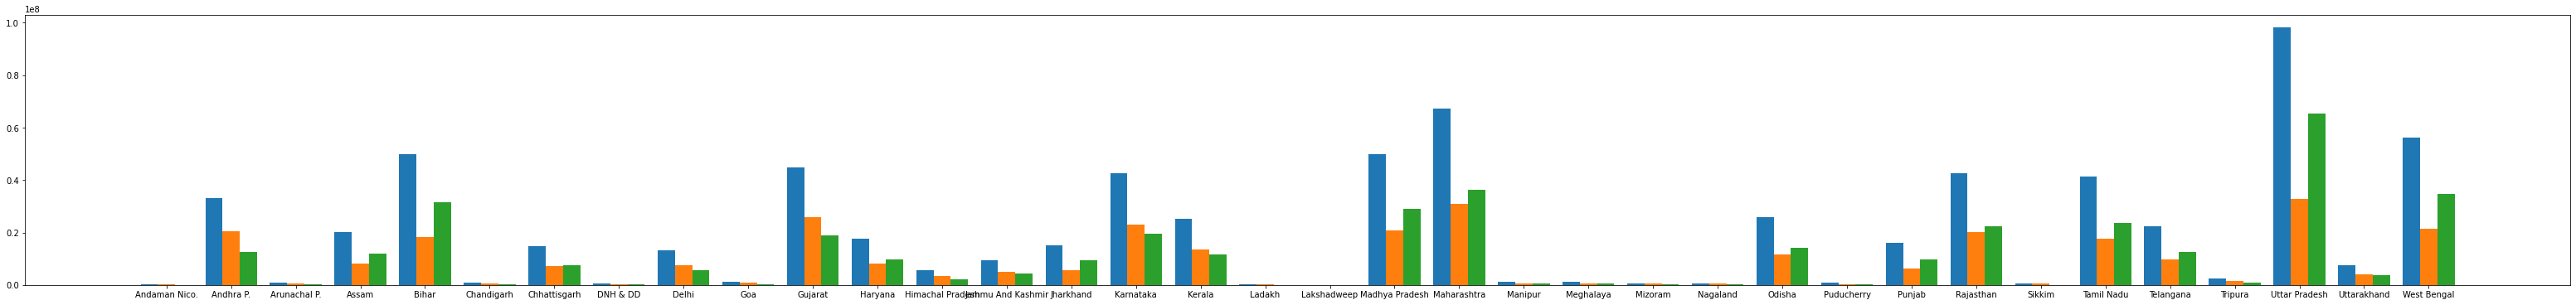

In [10]:
#Lets Rename some Big lettered States so that their label description is visible when the state data is plotted in X-axis

df.loc[7, 'States'] = "DNH & DD"
df.loc[1, 'States'] = "Andhra P."
df.loc[2, 'States'] = "Arunachal P."
df.loc[0, 'States'] = "Andaman Nico."
import numpy as np
import matplotlib.pyplot as plt
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df.States
Y = df.First_Dose
Z = df.Second_Dose
ZZ = df["Second_Dose"] - df["First_Dose"]
df["net"] = df["First_Dose"] - df["Second_Dose"] 
YY = df.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()

In [12]:
#Visualization for Smaller States & Finding Out which States are Performing well in Administering Doses at Equivalent Pace
df4 = df[(df['First_Dose']<3000000)]
df4.head(5)

,States,First_Dose,Second_Dose,net
0,Andaman Nico.,294001,200157,93844
2,Arunachal P.,771875,534486,237389
5,Chandigarh,926035,546981,379054
7,DNH & DD,660753,370255,290498
9,Goa,1262568,911114,351454


In [13]:
df4.describe()

,First_Dose,Second_Dose,net
count,1.400000e+01,1.400000e+01,14.000000
mean,8.369416e+05,5.430244e+05,293917.214286
std,6.014058e+05,3.840743e+05,230850.423077
min,5.512900e+04,4.595100e+04,9178.000000
25%,5.565105e+05,3.787800e+05,120275.000000
50%,7.227595e+05,5.013460e+05,263943.500000
75%,1.058965e+06,6.181095e+05,372154.000000
max,2.508477e+06,1.621329e+06,887148.000000


<Axes: xlabel='Second_Dose', ylabel='States'>

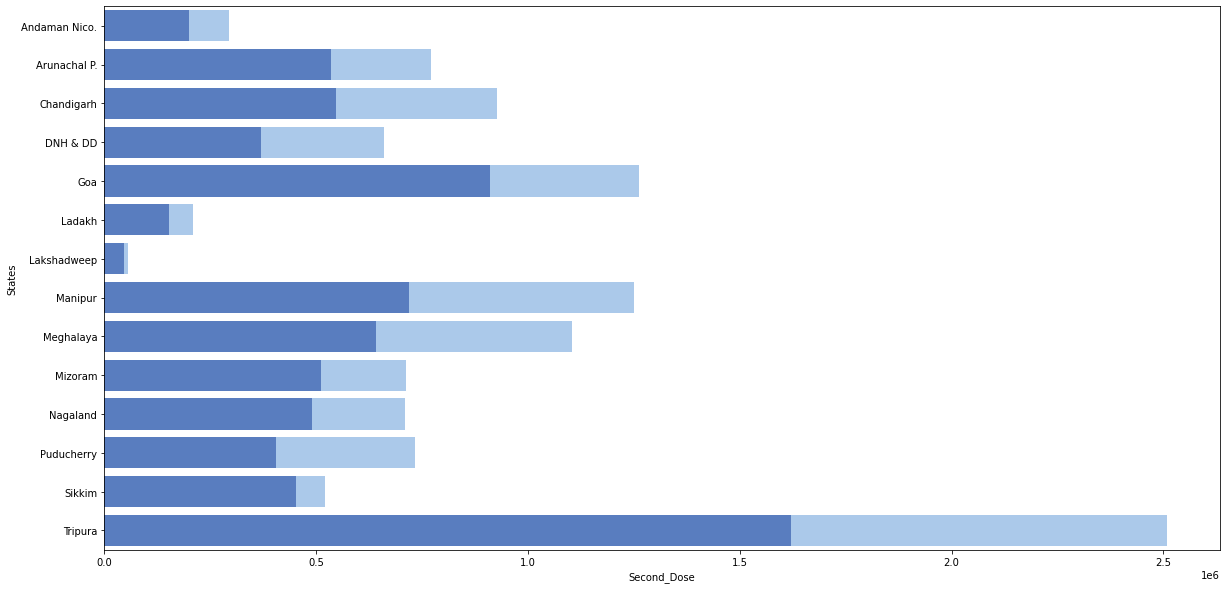

In [14]:
fig4, ax = plt.subplots(1,sharey="row",figsize=(20,10))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df4,
            label="Dose 1", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df4,
            label="First_Dose", color="b")

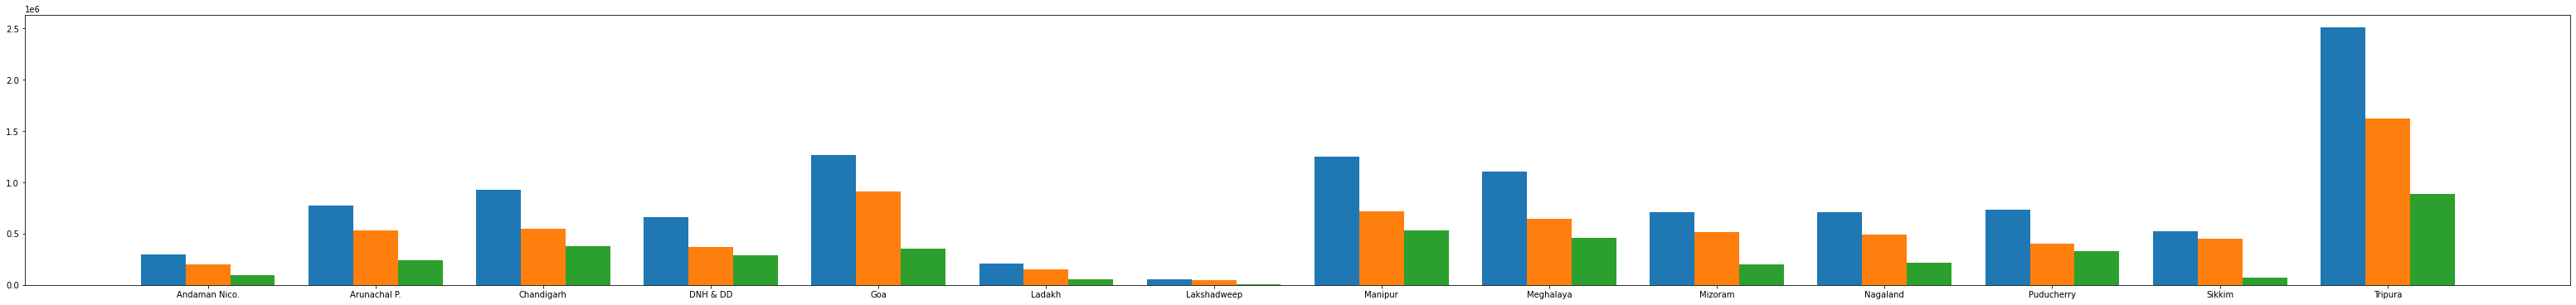

In [15]:
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df4.States
Y = df4.First_Dose
Z = df4.Second_Dose
YY  = df4.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()

From the above two plots it is evident that the States whose performance in administering both doses in equal pace are :

1 Lakshyadweep

2 Sikkim

3 Ladhak

And the States/Ut's which are not performing well on Admistering Dose 1 and 2 in Equivalent Pace are :

1 Tripura

2 Dadra and Nagar Havelli

3 Puducherry

In [16]:
#Visualization for Bigger States & Finding Out which States are Performing well in Administering Doses at Equivalent Pace
df5 = df[(df['First_Dose']>3000000)]
df5.head()


,States,First_Dose,Second_Dose,net
1,Andhra P.,32976969,20375181,12601788
3,Assam,20172463,8068795,12103668
4,Bihar,49874828,18346781,31528047
6,Chhattisgarh,14851682,7343273,7508409
8,Delhi,13055636,7425404,5630232


In [17]:
df5.describe()

,First_Dose,Second_Dose,net
count,2.200000e+01,2.200000e+01,2.200000e+01
mean,3.265531e+07,1.461753e+07,1.803778e+07
std,2.269920e+07,8.913494e+06,1.462047e+07
min,5.713695e+06,3.443823e+06,2.269872e+06
25%,1.522566e+07,7.363806e+06,9.464977e+06
50%,2.552157e+07,1.260963e+07,1.266397e+07
75%,4.418764e+07,2.072233e+07,2.335704e+07
max,9.817886e+07,3.268190e+07,6.549697e+07


<Axes: xlabel='Second_Dose', ylabel='States'>

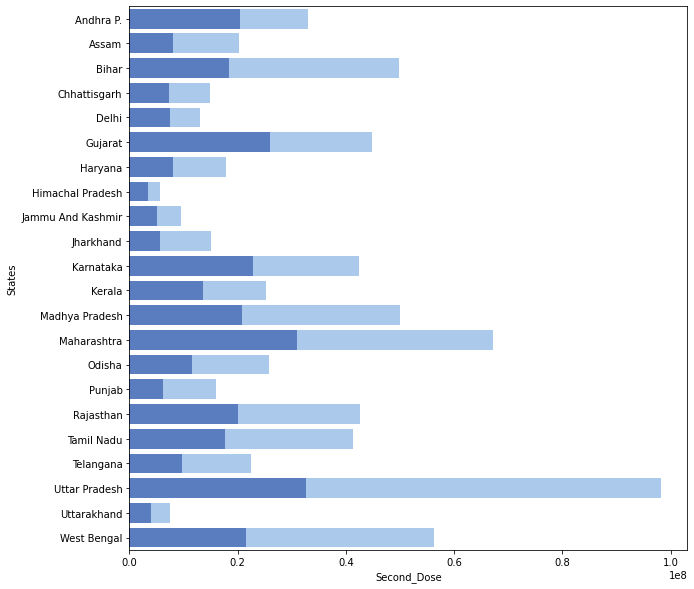

In [18]:
fig4, ax = plt.subplots(1,sharey="row",figsize=(10,10))
sns.set_color_codes("pastel")
sns.barplot(x="First_Dose", y="States", data=df5,
            label="Dose 1", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Second_Dose", y="States", data=df5,
            label="First_Dose", color="b")

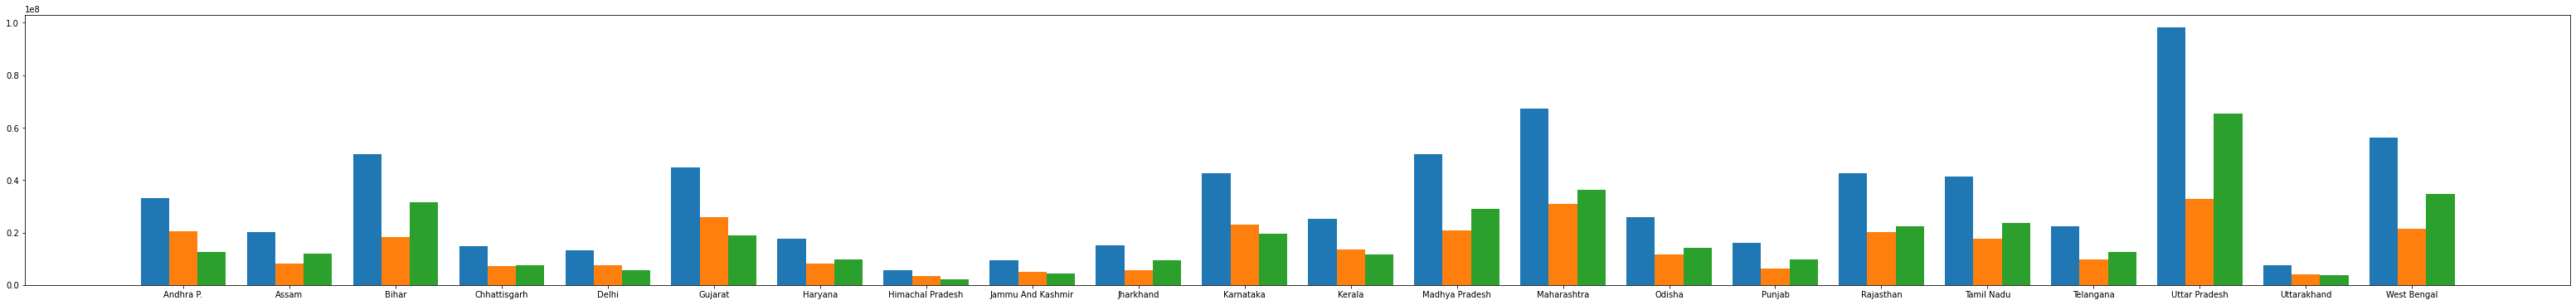

In [19]:
fig = plt.subplots(1,sharey="row",figsize=(55,6))

X = df5.States
Y = df5.First_Dose
Z = df5.Second_Dose
YY  = df5.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])

plt.show()


From the above two plots it is evident that the States whose performance in administering both doses in equal pace are :

1 Himachal Pradesh

2 Uttrakand

3 Jammu & Kashmir

4 New Delhi

And the States/Ut's which are not performing well on Admistering Dose 1 and 2 in Equivalent Pace are :

1 Uttar Pradesh

2 Bihar

3 West Bengal

Overall its been observed that , the states having less population are doing really great in administering both doses at the same pace , where as States having more population their performane is pretty Bad